In [1]:
'''Trains a simple convnet on the MNIST dataset.
Gets to 99.05% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

Using TensorFlow backend.
/Users/redouanelg/anaconda3/envs/kaggle/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 133s 2ms/step - loss: 0.3211 - acc: 0.9028 - val_loss: 0.0814 - val_acc: 0.9735
Epoch 2/12
60000/60000 [==============================] - 129s 2ms/step - loss: 0.1132 - acc: 0.9662 - val_loss: 0.0571 - val_acc: 0.9817
Epoch 3/12
60000/60000 [==============================] - 132s 2ms/step - loss: 0.0871 - acc: 0.9741 - val_loss: 0.0455 - val_acc: 0.9843
Epoch 4/12
60000/60000 [==============================] - 140s 2ms/step - loss: 0.0726 - acc: 0.9780 - val_loss: 0.0415 - val_acc: 0.9860
Epoch 5/12
60000/60000 [==============================] - 130s 2ms/step - loss: 0.0628 - acc: 0.9818 - val_loss: 0.0344 - val_acc: 0.9893
Epoch 6/12
60000/60000 [==============================] - 131s 2ms/step - loss: 0.0558 - acc: 0.9839 - val_loss: 0.0368 - val_acc: 0.9880
Epoch 7/12
60000/60000 [==============================] - 139s 2ms/step - loss: 0.0528 - acc: 0.9844 - val_loss: 0.0335 - 

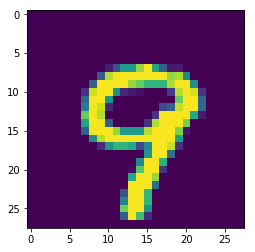

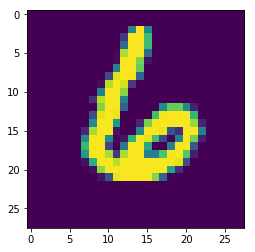

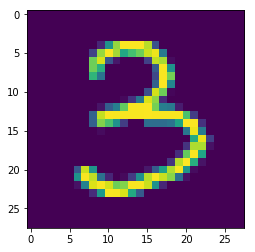

In [44]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

randindices=np.random.randint(x_test.shape[0],size=3)
plt.imshow(x_test[randindices[0],:,:,0])
plt.show()
plt.imshow(x_test[randindices[1],:,:,0])
plt.show()
plt.imshow(x_test[randindices[2],:,:,0])

In [26]:
predictions=model.predict(x_test)

In [45]:
print("I think the first digit is a " + str(np.argmax(predictions[randindices[0],:])) + ' with ' + str(np.max(predictions[randindices[0],:]) * 100) + '% confidence.')
print("I think the second digit is a " + str(np.argmax(predictions[randindices[1],:])) + ' with ' + str(np.max(predictions[randindices[1],:]) * 100) + '% confidence.')
print("I think the third digit is a " + str(np.argmax(predictions[randindices[2],:])) + ' with ' + str(np.max(predictions[randindices[2],:]) * 100) + '% confidence.')

I think the first digit is a 9 with 99.9998807907% confidence.
I think the second digit is a 6 with 100.0% confidence.
I think the third digit is a 3 with 100.0% confidence.
